In [106]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 695.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from feature_engine.wrappers import SklearnTransformerWrapper

In [87]:
ROOT = "/content/drive/MyDrive/dl-project"
DATA_FILE = f"{ROOT}/data/02-exogenous_univariate/riser_pq_uni.csv"
SEED = 78

rename_dict = {
    "Time (sec)": "time",
    "Pressure (bar) @x_{99}=56.9453": "pressure_1",
    "Pressure (bar) @x_{105}=60.4141": "pressure_2",
    "Pressure (bar) @x_{109}=62.7266": "pressure_3",
    "Pressure (bar) @x_{114}=65.6172": "pressure_4",
    "Pressure (bar) @x_{119}=68.5078": "pressure_5",
    "Pressure (bar) @x_{124}=71.3984": "pressure_6",
    "Pressure (bar) @x_{128}=73.7109": "pressure_7",
    "Gas mass rate (kg/sec)": "gas_flow_rate",
    "Liquid mass rate (kg/sec)": "liquid_flow_rate",
}

TRAINING_STEPS = 1500
TIME = ['time']
FEATURES = [
    'pressure_1', 'pressure_2', 'pressure_3', 'pressure_4',
    'pressure_5', 'pressure_6', 'pressure_7'
]
TARGET = ['liquid_flow_rate']

In [83]:
data = pd.read_csv(DATA_FILE).rename(columns=rename_dict)

In [84]:
data_ = (
    data[TIME + FEATURES + TARGET]
    .assign(time=np.floor(data['time']).astype(int))
    .groupby(['time'])[FEATURES + TARGET].mean()
    .reset_index()
    .sort_values(by='time')
)

data_

,time,pressure_1,pressure_2,pressure_3,pressure_4,pressure_5,pressure_6,pressure_7,liquid_flow_rate
0,0,2.066200,2.038975,1.849575,1.618100,1.394075,1.179475,1.014875,55.518500
1,1,2.069233,2.047900,1.862067,1.629967,1.404933,1.188800,1.025567,26.402000
2,2,2.064700,2.041100,1.857833,1.625100,1.399833,1.183967,1.019900,51.498667
3,3,2.060525,2.036700,1.856600,1.624475,1.399750,1.184250,1.020350,62.201250
4,4,2.057700,2.034233,1.856233,1.624233,1.399533,1.184133,1.020267,68.307667
...,...,...,...,...,...,...,...,...,...
2996,2996,1.949300,1.923615,1.722215,1.474322,1.232596,1.012781,0.999839,22.713000
2997,2997,1.951550,1.925865,1.724450,1.476523,1.234746,1.013769,0.999883,22.696038
2998,2998,1.953804,1.928130,1.726696,1.478752,1.236926,1.014926,1.000016,22.470111
2999,2999,1.956100,1.930422,1.728963,1.480967,1.239093,1.016293,1.000013,22.205667


In [89]:
train_data = data_.loc[data_['time'] <= TRAINING_STEPS, :]
test_data = data_.loc[data_['time'] > TRAINING_STEPS, :]

In [100]:
scaler = SklearnTransformerWrapper(MinMaxScaler(), variables=FEATURES + TARGET)

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

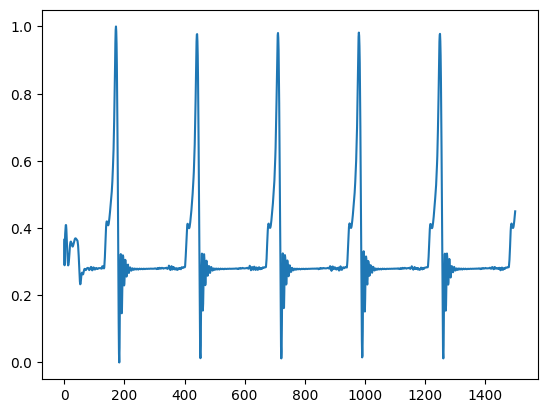

In [104]:
train_data_scaled.liquid_flow_rate.plot();

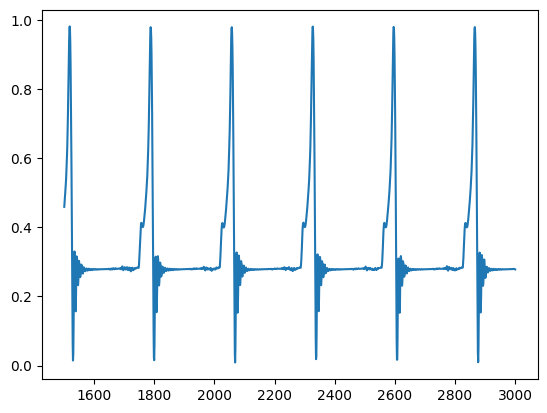

In [105]:
test_data_scaled.liquid_flow_rate.plot();

In [107]:
train_data_scaled.to_csv(f"{ROOT}/data/02-exogenous_univariate/train_data_scaled.csv", index=False)
test_data_scaled.to_csv(f"{ROOT}/data/02-exogenous_univariate/test_data_scaled.csv", index=False)